# Python 3학년 머신러닝의 구조
- Chapter 3 -> Lesson 12

### Lesson 12 회귀 - 선형 회귀
- [선형 회귀] 예측하고 싶은 상황을 수치로 입력하면 예측 결과를 수치로 출력하는 알고리즘
- 회귀: '어떤 수치가 될지를 예측하고 싶을 떄'
- 분류: '이것이 무엇인지 예측하고 싶을 때'

- 선형 회귀(linear regression): 직선
- 비선형 회귀(non-linear regression): 그냥 선

In [2]:
# 모듈 임포트
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

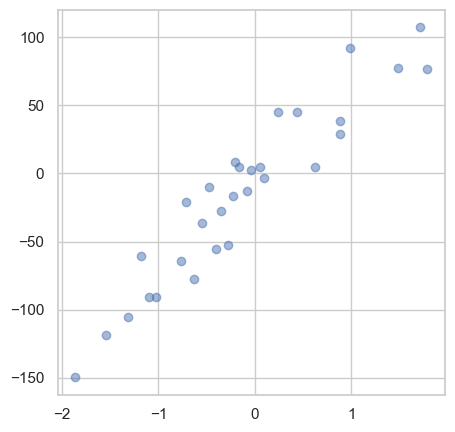

In [3]:
# 랜덤 시드 3, 특징량 1개, 노이즈량 20, 30개의 데이터세트를 만든다.
X, y = make_regression(
    random_state = 3,
    n_features = 1,
    noise = 20, # 노이즈 20
    n_samples = 30
)

#각 열 데이터(X)로 데이터 프레임 만들기
df = pd.DataFrame(X)
# X축에 특징량0, Y축에 y로 산포도 그리기
plt.figure(figsize = (5,5))
plt.scatter(df[0], y, color = "b", alpha = 0.5)
plt.show()

In [4]:
# 회귀 모듈 임포트
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

정답률: 84.98344774428918 %


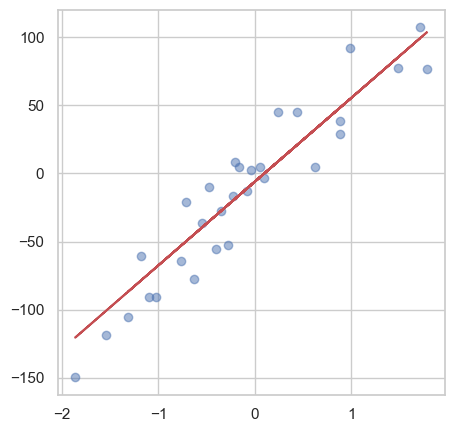

In [6]:
# 훈련 데이터, 테스트 데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 선형 회귀 학습 모델을 만든다(훈련 데이터로).
model = LinearRegression()
model.fit(X_train, y_train)

# 정답률을 조사한다(테스트 데이터로).
pred = model.predict(X_test)
score = r2_score(y_test, pred)
print("정답률:", score*100, "%")

# 산포도에 예측한 점을 많이 그려 선으로 만든다.
plt.figure(figsize = (5,5))
plt.scatter(X, y, color = "b", alpha = 0.5) # 산포도 작성
plt.plot(X, model.predict(X), color = "r") # 예측 선을 그린다.
plt.show()

정답률: 33.02568986960514 %


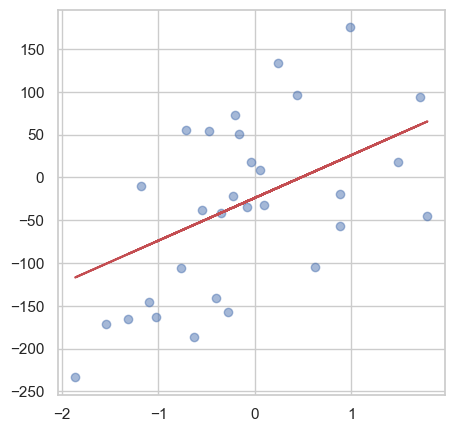

In [7]:
# 편차가 많은 데이터의 경우

# 노이즈 80인 데이터는 선 그리기도 어려워진다.
X, y = make_regression(
    random_state = 3,
    n_samples = 30,
    n_features = 1,
    noise = 80 # 노이즈 80
)

# 훈련 데이터, 테스트 데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#선형 회귀 학습 모델을 만든다(훈련 데이터로).
model = LinearRegression()
model.fit(X_train, y_train)

# 정답률을 조사한다(테스트 데이터로).
pred = model.predict(X_test)
score = r2_score(y_test, pred)
print("정답률:", score*100, "%")

# 산포도에 예측한 점을 많이 그려 선으로 만든다.
plt.figure(figsize = (5,5))
plt.scatter(X, y, color = "b", alpha = 0.5) # 산포도 작성
plt.plot(X, model.predict(X), color = "r") # 예측 선을 그린다.
plt.show()

### Lession 13 분류: 로지스틱 회귀
- 두 종류의 결과가 되는 데이터(yes, no)를 예측하는 알고리즘
- 로지스틱 시그모이드 함수 사용

- 로지스틱 회귀: 'YES'나 'NO'라는 두 종류(경우에 따라서는 세 종류 이상)의 분류를 회귀로 예측하는 알고리즘

In [9]:
# 모듈 임포트
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [10]:
# 산포도에 분류 상태를 그리는 함수
def plot_boundary(model, X, Y, target, xlabel, ylabel):
    cmap_dots = ListedColormap(["#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap(["#c6dcec", "#ffdec2", "#cae7ca"])
    plt.figure(figsize = (5,5))
    if model:
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200))
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        plt.pcolormesh(XX, YY, pred, cmap = cmap_fills, shading = "auto")
        plt.contour(XX, YY, pred, colors = "gray")
    plt.scatter(X, Y, c = target, cmap = cmap_dots)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [11]:
# 데이터 생성
from sklearn.datasets import make_blobs

#랜덤 시드 0, 특징랑 2, 클러스터 수 2, 편차 1, 300개의 데이터 세트를 만든다.
X, y = make_blobs(
    random_state = 0,
    n_features = 2,
    centers = 2,
    cluster_std = 1,
    n_samples = 300
)

df = pd.DataFrame(X)
print(df.head())
print(y)

          0         1
0  3.359415  5.248267
1  2.931100  0.782556
2  1.120314  5.758061
3  2.876853  0.902956
4  1.666088  5.605634
[0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1
 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1
 0 1 1 0]


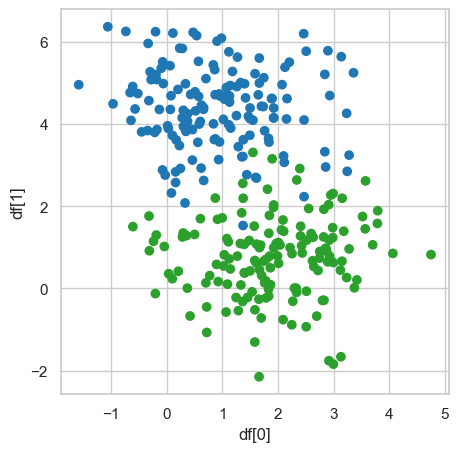

In [12]:
# 산포도 그리기
plot_boundary(None, df[0], df[1], y, "df[0]", "df[1]")

정답률: 96.0 %


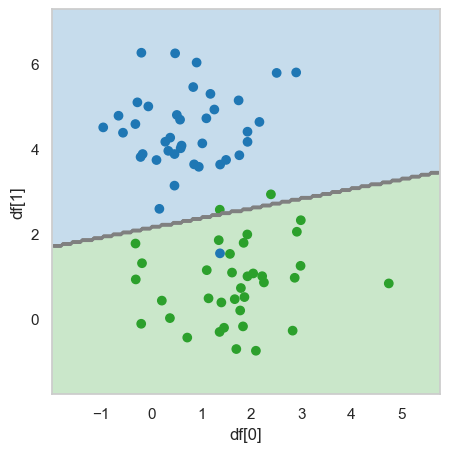

In [13]:
# 로지스틱 회귀 모델 생성
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 훈련 데이터, 테스트 데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 로지스틱 회귀 학습 모델을 만든다(훈련 데이터로).
model = LogisticRegression()
model.fit(X_train, y_train)

# 정답률을 조사한다(테스트 데이터로).
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("정답률:", score*100, "%")

# 이 학습 모델의 분류 상태를 그린다(테스트 데이터로).
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df[0]", "df[1]")

정답률: 82.66666666666667 %


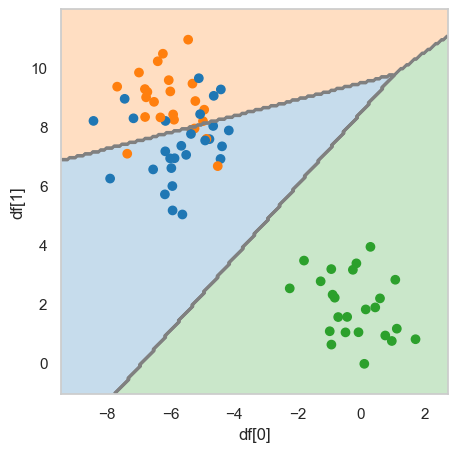

In [14]:
# 세 종류로 분류하는 경우

# 랜덤 시드 4, 특징량 2, 클러스터 수 3, 편차 1, 300개의 데이터 세트를 만든다.
X, y = make_blobs(
    random_state = 5,
    n_features = 2,
    centers = 3, # 클러스트 수는 3
    cluster_std = 1,
    n_samples = 300
)

# 훈련 데이터, 테스트 데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 로지스틱 회귀 학습 모델을 만든다(훈련 데이터로).
model = LogisticRegression()
model.fit(X_train, y_train)

# 정답률을 조사한다(테스트 데이터로).
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("정답률:", score*100, "%")

# 이 학습 모델의 분류 상태를 그린다(테스트 데이터로).
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df[0]", "df[1]")

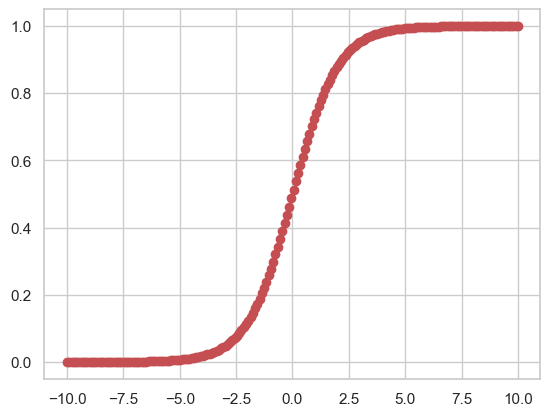

In [15]:
# 시그모이드 함수의 모양

# x의 값(-10 ~ 10을 200개로 분할)
xx = np.linspace(-10, 10, 200)

# 시그모이드 함수
yy = 1 / (1 + np.exp(-xx))

plt.scatter(xx, yy, color = "r")
plt.show()